# Emotional Consistency among Political Ideologies: An Approach to Address Polarization on Youtube

Group 5:
- Chance Landis (ChancL), Hanna Lee (Lee10), Jason Sun (YongXs), Andy Wong (WongA22)

## Credit Listing
- Hanna: Democratic-leaning Channels Data Collection
- Chance: Republican-leaning Channels Data Collection
- Andy: Exploratory Data Analysis
- Jason: Text Documentation

## Problem Statement
We want to figure out whether the current political polarization is associated with the emotional values expressed by each party. Due to the current politically charged environment of our country, the semblance of sympathizing toward a value that is not related to your political party causes backlash. This fear of backlash can create a “false” polarized environment, which is an extension of the fear itself. The question that arises is whether these boundaries are reinforced by the people themselves and/or  external factors, like social media.

## Research Question
1. Do political parties exhibit similar emotional responses to differing ideologies?

## Data Collection
To investigate this topic, we will analyze content from the top five YouTube channels associated with Democratic and Republican viewpoints, based on subscriber counts. The channels selected for the study are:

- **Democratic-leaning Channels**: Vice, Vox, MSNBC, The Daily Show, The Young Turks
- **Republican-leaning Channels**: Fox News, Ben Shapiro, Steven Crowder, The Daily Mail, The Daily Wire

We have identified eight key ideologies for this analysis to understand if there are emotional differences in how political parties discuss these topics. For each ideology, a set of keywords has been established to facilitate data scraping:
a
- **ISIS**: Terrorism, Extremism, Radical
- **Guns**: Shootings, School shooting, Firearms, Gun control, NRA, Second Amendment
- **Immigration**: Border control, Mexico, Visa /Citizenship, Asylum, Deportation, Refugee
- **Economy**: Budget deficit, Unemployment, Inflation, Interest rate, Federal Reserve, Market, Employment
- **Health care**: Medicaid, Covid, Obamacare, Public health, Insurance
- **Socio-economic**: Rich / poor, Income inequality, Poverty, Wealth distribution
- **Abortion**: Pregnancy, Unwanted Pregnancy, Roe, Wade, Abortion, Pro-life, Rape, Incest, Life of mother, Religion
- **Climate change**: Global Warming, Carbo, Alternative Energy, Climate, Methane, Emissions, Gas, Greenhouse

### Sources of Information
- **AllSides**: A media bias tool that provides a rating based on "multi-partisan Editorial Reviews by trained experts and Blind Bias Surveys™ in which participants rate content without knowing the source." We used this tool to determine how we should classify the most popular (based on subscriber count) YouTube channels we found. (Source: https://www.allsides.com/media-bias/media-bias-rating-methods)
- **HypeAuitor**: A company that uses a data-driven approach to influencer marketing. In the process, they collated lists of YouTube based on category, subscriber count, and country. This allowed us to find YouTube channels that focused on news and politics with the most subscribers. (Source: https://hypeauditor.com/about/company/, https://hypeauditor.com/top-youtube-news-politics-united-states/)
- **Pew Research Center**: A nonpartisan, nonprofit organization that conducts research on public opinion, demographic trends, and social issues. It provides data-driven insights into various aspects of social science issues, explicitly stating they do not take a stance on political issues. For our research, we relied on their studies on political ideologies and alignment with political parties as a reference. (Source: https://www.pewresearch.org/about/, https://www.pewresearch.org/politics/2016/06/22/5-views-of-parties-positions-on-issues-ideologies/)
- **YouTube**: As a group, we've chosen to expand our collection of YouTube videos by selecting additional keywords associated with the ideology we're studying. Our focus will be on gathering comments from these videos to conduct our research.
    - We used a combination of Andy and Hanna's code to get the comments from YouTube channels.

In [58]:
# imports
import json
import pandas as pd

import nltk

import googleapiclient
import googleapiclient.discovery
import googleapiclient.errors
from googleapiclient.errors import HttpError

import re
import datetime
from datetime import datetime
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import casual

from nrclex import NRCLex

import matplotlib.pyplot as plt

In [5]:
# Function for Text Cleaning
def textcleaner(row):
    row = str(row)
    row = row.lower()
    # remove punctuation
    row = re.sub(r'[^\w\s]', '', row)
    #remove urls
    row  = re.sub(r'http\S+', '', row)
    #remove mentions
    row = re.sub(r"(?<![@\w])@(\w{1,25})", '', row)
    #remove hashtags
    row = re.sub(r"(?<![#\w])#(\w{1,25})", '',row)
    #remove other special characters
    row = re.sub('[^A-Za-z .-]+', '', row)
        #remove digits
    row = re.sub('\d+', '', row)
    row = row.strip(" ")
    row = re.sub('\s+', ' ', row)
    return row
    
# Function for Stopword Removal
stopeng = set(stopwords.words('english'))
def remove_stop(text):
    try:
        words = text.split(' ')
        valid = [x for x in words if x not in stopeng]
        return(' '.join(valid))
    except AttributeError:
        return('')

# Function for Checking NRC Lexicon Sentiment (Pos / Neg)
def nrc_sen(text, cat):
    sen = NRCLex(text)
    if cat == 'pos':
        return sen.affect_frequencies['positive']
    else:
        return sen.affect_frequencies['negative']
    
# Function for checking NRC Lexicon Emotion (Returns highest emotion)
def nrc_emo(text, ver):
    emo = NRCLex(text).affect_frequencies
    max_emo = max(emo, key=emo.get)
    max_score = emo[max_emo]
    if ver == 'score':
        return max_score
    else:
        return max_emo

# Democratic Data

In [29]:
# Data Loading + Preview
demo_df = pd.read_csv('democrat_comments.csv')
demo_df.head()

,channel,id,title,keyword,published_at,VideoViews,VideoId,CommentId,CommentTitle,CommentCreationTime,CommentLikes
0,Vice,qX_aaRepdIM,Running a Nightclub During a Pandemic,Pandemics,2020-09-23T19:00:18Z,137070,qX_aaRepdIM,UgyT8lzHq4KG18pbEAx4AaABAg,A lot of businesses are struggling. The ones t...,2020-09-23T19:56:07Z,75
1,Vice,qX_aaRepdIM,Running a Nightclub During a Pandemic,Pandemics,2020-09-23T19:00:18Z,137070,qX_aaRepdIM,UgwWciuwhjWJtn5p2B54AaABAg,Damn the World really sucks now.\nLooking forw...,2020-09-23T20:42:39Z,89
2,Vice,qX_aaRepdIM,Running a Nightclub During a Pandemic,Pandemics,2020-09-23T19:00:18Z,137070,qX_aaRepdIM,UgxAbD9h5oBPSxaRgvN4AaABAg,"Sadly I think at least 50% of clubs, bars and ...",2020-09-24T08:16:30Z,45
3,Vice,qX_aaRepdIM,Running a Nightclub During a Pandemic,Pandemics,2020-09-23T19:00:18Z,137070,qX_aaRepdIM,Ugx5ivt655zG1cctmVJ4AaABAg,I love Plant. It was one of the highlights to ...,2020-09-27T21:20:05Z,4
4,Vice,qX_aaRepdIM,Running a Nightclub During a Pandemic,Pandemics,2020-09-23T19:00:18Z,137070,qX_aaRepdIM,UgztX1erPMN0W9t8tWZ4AaABAg,"""AKA DJ Bowlcut"" lmao 😂😅😅",2020-09-23T19:31:59Z,53


In [30]:
# Basic DF Properties
print('DF Dimensions: ' + str(demo_df.shape))
for row in demo_df:
    print('%s: ' %row + str(type(demo_df[row][0])))

DF Dimensions: (11662, 11)
channel: <class 'str'>
id: <class 'str'>
title: <class 'str'>
keyword: <class 'str'>
published_at: <class 'str'>
VideoViews: <class 'numpy.int64'>
VideoId: <class 'str'>
CommentId: <class 'str'>
CommentTitle: <class 'str'>
CommentCreationTime: <class 'str'>
CommentLikes: <class 'numpy.int64'>


In [31]:
# Check for NaN and drop NaN
print('Rows with NaN: ' + str(sum(demo_df.isna().sum(axis=1))))
demo_df = demo_df.dropna()

Rows with NaN: 0


In [32]:
# Change date columns to a date type
demo_df['published_at'] = demo_df['published_at'].apply(lambda x: datetime.strptime(str(x)[0:10], '%Y-%m-%d').date())
demo_df['CommentCreationTime'] = demo_df['CommentCreationTime'].apply(lambda x: datetime.strptime(str(x)[0:10], '%Y-%m-%d').date())
print('Title Example:')
print(demo_df['title'][0])
print()
print('Comment Example')
print(demo_df['CommentTitle'][0])

Title Example:
Running a Nightclub During a Pandemic

Comment Example
A lot of businesses are struggling. The ones that aren’t struggling as much are banks and grocery stores.


In [36]:
# Tokenize
demo_df['TitleToken'] = demo_df['title'].apply(lambda x: casual.TweetTokenizer().tokenize(x))
demo_df['CommentToken'] = demo_df['CommentTitle'].apply(lambda x: casual.TweetTokenizer().tokenize(x))
print('Title Example:')
print(demo_df['TitleToken'][0])
print()
print('Comment Example')
print(demo_df['CommentToken'][0])

Title Example:
['Running', 'a', 'Nightclub', 'During', 'a', 'Pandemic']

Comment Example
['A', 'lot', 'of', 'businesses', 'are', 'struggling', '.', 'The', 'ones', 'that', 'aren', '’', 't', 'struggling', 'as', 'much', 'are', 'banks', 'and', 'grocery', 'stores', '.']


In [37]:
# Clean text
demo_df['TitleCleaned'] = demo_df['TitleToken'].apply(lambda x: remove_stop(textcleaner(x)))
demo_df['CommentCleaned'] = demo_df['CommentToken'].apply(lambda x: remove_stop(textcleaner(x)))
print('Title Example:')
print(demo_df['TitleCleaned'][0])
print()
print('Comment Example')
print(demo_df['CommentCleaned'][0])

Title Example:
running nightclub pandemic

Comment Example
lot businesses struggling ones struggling much banks grocery stores


In [39]:
# Calculate Positivity/Negativity Scores for Titles and Comments
demo_df['TitlePos'] = demo_df['TitleCleaned'].apply(lambda x: nrc_sen(x, 'pos'))
demo_df['TitleNeg'] = demo_df['TitleCleaned'].apply(lambda x: nrc_sen(x, 'neg'))    
demo_df['CommentPos'] = demo_df['CommentCleaned'].apply(lambda x: nrc_sen(x, 'pos'))    
demo_df['CommentNeg'] = demo_df['CommentCleaned'].apply(lambda x: nrc_sen(x, 'neg'))        
demo_df[['TitleCleaned', 'TitlePos', 'TitleNeg', 'CommentCleaned', 'CommentPos', 'CommentNeg']].head(1)

,TitleCleaned,TitlePos,TitleNeg,CommentCleaned,CommentPos,CommentNeg
0,running nightclub pandemic,0.0,0.333333,lot businesses struggling ones struggling much...,0.0,0.0


In [40]:
# Calculate Emotion Scores for Titles and Comments
demo_df['TitleEmotion'] = demo_df['TitleCleaned'].apply(lambda x: nrc_emo(x, 'emo'))
demo_df['TitleEmotionScore'] = demo_df['TitleCleaned'].apply(lambda x: nrc_emo(x, 'score'))    
demo_df['CommentEmotion'] = demo_df['CommentCleaned'].apply(lambda x: nrc_emo(x, 'emo'))
demo_df['CommentEmotionScore'] = demo_df['CommentCleaned'].apply(lambda x: nrc_emo(x, 'score'))    
demo_df[['TitleCleaned', 'TitleEmotion', 'TitleEmotionScore', 'CommentCleaned', 'CommentEmotion', 'CommentEmotionScore']].head(1)

,TitleCleaned,TitleEmotion,TitleEmotionScore,CommentCleaned,CommentEmotion,CommentEmotionScore
0,running nightclub pandemic,fear,0.333333,lot businesses struggling ones struggling much...,fear,0.0


# Democratic Data Analysis

Percentage Title Emotion Distribution
fear: 0.482673
trust: 0.217822
negative: 0.143564
anger: 0.034653
positive: 0.071782
sadness: 0.009901
anticipation: 0.022277
surprise: 0.017327


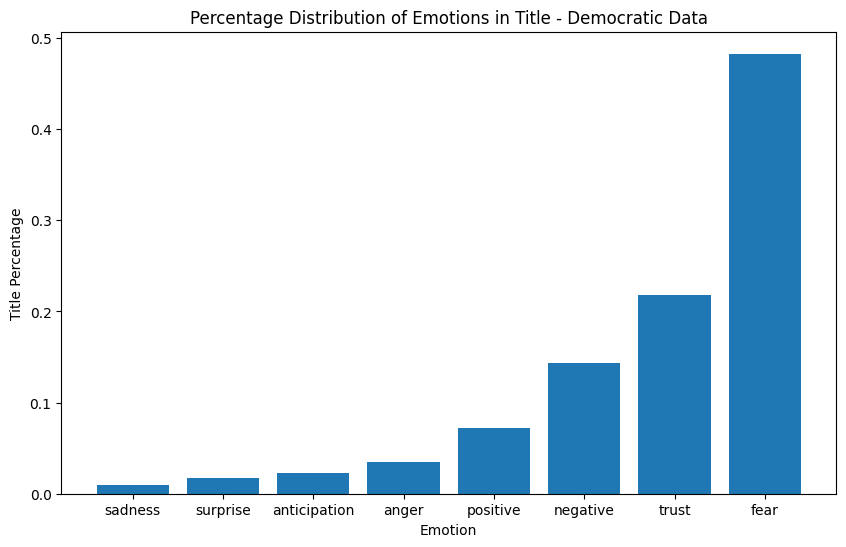

In [87]:
# Drop Duplicate Title Points
demo_df_title = demo_df.drop_duplicates(subset=['title'])

# Comment Emotion Distribution Analysis
print('Percentage Title Emotion Distribution')
emo_per = {}

# Calculate and Output Emotion Percentage
for emo in demo_df_title['TitleEmotion'].unique():
    print('%s: %f' %(emo, len(demo_df_title[demo_df_title['TitleEmotion'] == emo])/len(demo_df_title)))
    emo_per[emo] = len(demo_df_title[demo_df_title['TitleEmotion'] == emo])/len(demo_df_title)

# Order and Plot values
emo_per = dict(sorted(emo_per.items(), key = lambda x: x[1]))
plt.figure(figsize=(10,6))
plt.bar(emo_per.keys(), emo_per.values())
plt.xlabel('Emotion')
plt.ylabel('Title Percentage')
plt.title('Percentage Distribution of Emotions in Title - Democratic Data');


Percentage Comment Emotion Distribution
fear: 0.315641
anger: 0.048276
positive: 0.260676
surprise: 0.026668
negative: 0.131624
trust: 0.177414
anticipation: 0.032413
sadness: 0.005659
disgust: 0.001458
joy: 0.000171


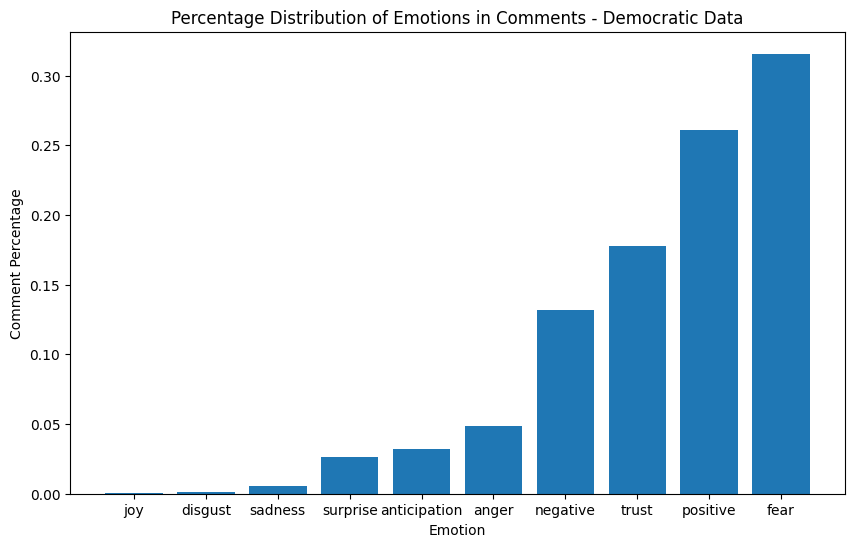

In [79]:
# Comment Emotion Distribution Analysis
print('Percentage Comment Emotion Distribution')
emo_per = {}

# Calculate and Output Emotion Percentage
for emo in demo_df['CommentEmotion'].unique():
    print('%s: %f' %(emo, len(demo_df[demo_df['CommentEmotion'] == emo])/len(demo_df)))
    emo_per[emo] = len(demo_df[demo_df['CommentEmotion'] == emo])/len(demo_df)

# Order and Plot values
emo_per = dict(sorted(emo_per.items(), key = lambda x: x[1]))
plt.figure(figsize=(10,6))
plt.bar(emo_per.keys(), emo_per.values())
plt.xlabel('Emotion')
plt.ylabel('Comment Percentage')
plt.title('Percentage Distribution of Emotions in Comments - Democratic Data');

In [ ]:
# Average Score per Emotion - Title

# Comment Emotion Distribution Analysis
print('Average Score per Emotion')
emo_score = {}

# Calculate and Output Emotion Percentage
for emo in demo_df_title['TitleEmotion'].unique():
    emo_score[emo] = demo_df_title[demo_df_title['TitleEmotion'] == emo]['TitleEmotionScore'].mean()
    print('%s: %f' %(emo, emo_score[emo]))

# Order and Plot values
emo_score = dict(sorted(emo_score.items(), key = lambda x: x[1]))
plt.figure(figsize=(10,6))
plt.bar(emo_score.keys(), emo_score.values())
plt.xlabel('Emotion')
plt.ylabel('Title Percentage')
plt.title('Percentage Distribution of Emotions in Title - Democratic Data');


Average Score per Emotion


TypeError: Could not convert ['ViceViceViceViceViceViceViceViceViceViceViceViceViceViceViceViceViceViceViceViceViceViceViceViceViceViceVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxVoxMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCMSNBCDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowDaily ShowYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung TurksYoung Turks'
 'qX_aaRepdIMD669qcb7GGIQX3M8Ka9vUAZh2e8nY8VJ04PfZlxhvdkMxnS2CTmdA0AM4BOdBJFkgAy20Tx2eCw28q2roLP6HIQAcdZy4balvB8qavbWjQpDhA2RZoGOc3VCsSwoRx3tstxY3JFihjEWU3cvaTnP5AgQ_gUnETVMI4tY84qePOEBm9AwegEbJ2gukxUDkk1rMARYOYXnpbVRg1-qc-1A9v5bQDqk7fJpRa7o_fQ388wlVWxGz0gt7HlHDmc_4tNwkY_V_BPIgXBR5ZrKdws4Ltr7x8nO2M_e0VofLJTIkZ9gQLELtbhgHJ034SvB16EyeaQUhAOdtkqcJeOphUtekAl0rBxHuVk4nUnJQWO4YJYBB3qNWRaxGEqdjArlHB8k8yzDjjUAt3zc3bIvqS7gnQot6V9i8fFADIiKHl__BEsD0FBwFJeleth0VIY0FF3TE_E_0TCrGtTEQMLRP2Vw9ix-sylLTMYt24lAmvA9gs5gxNYr2fxJI_cP58RWSaceaSpRIBzuk13Ftxgo2ty2J0s2W0criWh6Ljgu_MhwuujiHvducEyAdby3hMRM1O_YHxd_HWQol6xKUkYyhMqp5CEcIyk941xbt0ACMbiAoRUjKZOhV6EutUOJ64X7u0mBoAMsif9Gk18lf1kpBgRkK3odScka55AK5E8eeyAQLMFoTE-6wWxXsFHQqKWxF1Tgqwqm8T_IFzk2OVMYUFWoaUpzmO6RWy1v8RCLQREWIwyAENw2y0ek1JgUI4g_amOTSgtfZYfYbONmIJ1wJuXjrxDUMbDIYj7IIQoqXdjt8ZBQbESVxPp2POkCY1ltzfeFeiP4mUutMIoBucoFPK35AVH8BQyTFGRCL_ZTccolxgYIy4molgRP_w4CgBwSU9avQSjJrMLZRgMwS7B8oDnpgzhZRwPEhpIhbJTW42MHqMl3HfR8nku0wKRykb5HYYBdZ3QtLrHIQooenWhi1eUAjDuf7gx4FwSxfMlsygxcIDe1TSLJecSc3fF8MfxFgQgY_V7b6P6hDkTdluMvfUM4MXYz8QsZeXz4S-uhgpXAATYJpaU7z0dBWQfhpVTUt_0Mcwc6csjcb5mk5UwR1DzpXjM7Q0Y0xeOS4k9iFseaHfyMc3qD_PZRiCDshJvaTbWnHiUnEuVk9RojywQRdwjOKUmCUMgcymCOriGs28kZLsnFgDMBS7iJlx1j14i6EDH_OLoK00XOYFb1nDMYfsrpFu9imkoBZ_f66aoZ0IV_SW8248GoExlS1Jkucs6IcWM8V9q9XSkW5kJA_Pc_jQ8mwVtmsVgRQsYht9MF2QLUY8Pbtbai9dME292SryC4nkKs3825r31GU26J0FZQJHaYcy5IxnikE5ANW94cqI9-YgcV0vH_IIQo46J55FgWN85ocoL1uedveZEnnPuCJqRn4Uv2bIyik6JUIhqgFwO2D0NUndl97Kt9ERQUZw5EbpZOoYhESoqv2AwWAjUcE3h2A_CweBhmqoRj_t4-sTZrgkQx4EDZIHXZKqDeQU3fPfQ8MZFQF0kBaf-iKUsHUhe-4Tqek82Py-MLiX_0gyp5HylZ05kMsgHQknJnuRkvbCSiHc-szYTN5-1QX8XZIoOndvtJ5LKMbLsRnx5wAdsXwxIqBCrvykHPAd81AzqXg5byqAsAqWskN8zF9tAzu74VfhV-ppYORUZPYkWsa77RkDrN9NCzeU-0F6oHayc5pjoMEc2gfWcQEcymF88jc2oPo_7nnyMHUUys4vw4sCou7wUtZu91Y_l8dcSkFJTsEsMVYJiPtY6stLB4yWMmnfjTT8sQ8lGHAPfSis5SlR-UHguKYV33C3pqZLkANEbvhGPbZy0aJzXrnTIJ7MffyycT9y09UchTEF4JFWlsNn2mgrLP8Aci_4t16NNITIfR46YIa11ZgaOjNXlg9bNgxRq0SCJCAPs85-QTg1gWVUUHhCKM7ZVoE32WrXoGqA-oIbzzED4SSV4KFclnQ6fLtMZLoHwv-VG4sa_bRrhcXwQwdXpAgVPLUbYyC85kgIaHfgteTvOBr5T3UktgloH7vlo8prPxJ5sE4HcNXuPjIew2RQSyCVud_BPr4sEW1RMVXEPcOV3wyVxqsDUojKd6KrDl18'
 'Running a Nightclub During a PandemicThe Challenges of Being Homeless During a PandemicThe Third Industrial Revolution: A Radical New Sharing EconomyThe Deadliest Mass Shooting in America | Source MaterialThe Replacement Conspiracy Inspiring Mass Shootings | Decade of HateInside One of the Last Abortion Clinics in AlabamaHow the Pandemic is Making Pakistan’s Tech Industry More EquitableAssad\'s Syria & Cost of Climate Change (VICE on HBO: Season 5, Episode 1)Abortion Access in the Maritimes‘He Didn’t Think He Would Make It’ - Battling To Save Lives During the PandemicThe Dangers of Medical Tourism in Mexico #shortsMexico\'s Most Wanted Drug Kingpin | The War on DrugsWe Uncovered an ISIS Mass Grave | Super UsersFrom Homeless to Pro-Skater: Chad Muska | Epicly Later\'d\'Never Going Back:\' Releasing Inmates During a PandemicThis Dishwasher Charges $60K to Design Custom GunsAddicted While Homeless | DOPESICK NATION (Episode 3)From Poverty to King of Bling | House of Dang Episode 1Gen Z’s War on Climate Change | Vice Around the World Episode 24Teenage Credit Card Scammers Stealing From the Rich | CrimewaveFirearms Training at a One Star Gun Range | One Star ReviewsCan Japanese Paid Companions Survive a Pandemic?Why Mexican Cartels Use American Guns | The War On DrugsStealing from the Rich: The Modern Day Robin HoodDoes Climate Change Really Mean the End of the World?  | Let Lee ExplainThe Teenager Suing the US Government over Climate ChangeWhat happens after ISIS falls?Who’s buying all the guns? #shortsThe mysterious rays shooting at us from spaceA brief history of ISISHow to fight climate change with parking lotsHow the NRA hijacks gun control debates4 ways Americans are still getting abortion pillsThe diet that helps fight climate changeWhy US gun laws get looser after mass shootingsWhy ISIS attacked BrusselsWatch the US stall on climate change for 12 yearsWhy ISIS would attack ParisHow the rich avoid paying taxesThe law that broke US immigrationWhat Michigan\'s Prop 3 means for abortion #shortsThe wall of eyes trained on the US - Mexico borderHow climate change makes hurricanes worseTimothy Geithner on the Great RecessionHow American CEOs got so richmRNA vaccines, explainedThe risky way to speed up a coronavirus vaccineAs if teachers\' jobs aren\'t hard enough, they\'re asked to fix poverty, tooHow US abortion policy targets the poor | 2020 ElectionHow rich countries are making the pandemic last longerDo "gun buybacks" work?The next pandemic could come from our farmsCow burps are a climate problem. Can seaweed help? #shortsHow abortion bans make inequality worseHow will the next generation of cities address the challenges of climate change? [Ad Content]How humans are making pandemics more likelyHow the US outsourced border security to MexicoCow burps are a climate problem. Can seaweed help?Why this Russian gas company sponsors soccer teamsTwo laws that make gun violence worse  #shortsISIS videos are sickening. They’re also really effective.Why you can\'t compare Covid-19 vaccinesWhy Top Gun won the Oscar for soundThe US broke voting records in a pandemicLyme disease is spreading. Blame ticks — and climate changeWhy seeking asylum in America is so difficultWhy Mormons identify with Syrian refugeesThe rise of ISIS, explained in 6 minutesAmericans feel passionate about abortion but don\'t know much about itThe gun solution we\'re not talking aboutWhat a new Supreme Court means for abortionHow gun laws get looser after mass shootings #shortsInside Top Gun: Maverick’s Oscar-winning sound design #shortsISIS is losing. Watch how and why it\'s happening.Big questions about the Covid booster shot, answered\'It can occur anywhere\': NV and IL attorneys general on gun violence epidemic‘I’m pissed off’: Jason Kander reacts to mass shooting at Chiefs Super Bowl paradeWatch: Trump RICO co-defendant Harrison Floyd hearing in Fulton County, GAThe challenges Ukrainian refugees face in PolandChild poverty skyrockets a year after record low‘The existential threat of our time’: Biden\'s export pause scores major win for climate activistsPediatricians, parents struggle to get updated Covid vaccine for kidsAlabama carries out first nitrogen gas execution\'Tell Me When It\'s Over\' looks at lessons learned from the Covid-19 pandemic\'The critical economic issue\': Why grocery prices stay high as inflation declinesSteve Rattner: Inflation subsided and median incomes are upKansas City mayor \'heartbroken\' over shootingJoe: Democrats are running against GOP\'s \'crash the economy, open border\' platformRep. Frost reacts to Kansas City shootingTrump’s mass deportation agenda: \'It’s not the border… it’s mean-spirited white nationalist thread\'Sen. Booker: Child poverty in the U.S. is a policy decisionFmr. Prosecutor: Hearing in Trump’s GA case left us with more questions than answersGiuliani could soon be “handing over his paychecks” to GA election workersUNRA Rep on Ukrainian refugees returning home: “The main obstacle to return is safety and security”\'Hamas is worse than ISIS\': Senior Advisor to PM NetanyahuA Chicago professor and her students are helping migrants seeking asylumGun violence is America’s ‘biggest epidemic’: Jemele Hill & Maxwell Frost on Kansas City shootingLawrence: There was a confession about leaks today in Trump\'s GA RICO caseSen. Merkley on COP28: U.S. is ‘leading with an example that will take us to climate oblivion’Inside the fight to end period poverty“Much ado about nothing:” Trump tries to dismiss GA case‘Petri dish for terrible gun laws’: Missouri legislator reacts to Kansas City mass shootingSenator admits Biden\'s message on economy still hasn\'t \'broken through\'Hamas terrorism echoes barbaric playbook from Putin to ISIS, warns historianThe Atlantic’s Jemele Hill on gun violence\'Alabama has done it and now so can you\': Ala. AG praises first nitrogen gas executionJoe slams the GOP\'s ‘crash the economy, open border\' platformDavid French: What it would mean to treat Hamas like ISIS“Violently shaking, thrashing:” Witness details first ever nitrogen gas executionAuthors of \'The Big Fail\' on what the U.S. learned from the COVID-19 pandemicHow Abraham Lincoln evolved on immigrationProperty Brothers on their climate activism and new showsCedric Alexander: Officers \'were the difference between life and death\' in Lakewood Church shootingEconomists say recession unlikely in 2024, according to surveyKimberly Atkins Stohr: GA District Attorney Fani Wilis ‘has the right’ to defend herselfLessons from America\'s counterterrorism missteps in Mosul‘Biden has 9 months to tell the story’: The struggle to reach voters on the economy\'My heart is breaking\': Claire McCaskill on Kansas City ShootingMichigan AG Dana Nessel: Jury in Jennifer Crumbley trial made clear that ‘firearms are not toys’Harris pledges $3 billion from U.S. to climate fundRet. Major Spencer: ‘Strain’ of Gaza war on Israel’s economy ‘is substantial’ and ‘takes a toll’Kevin Bacon builds essentials kits for homeless, stresses need for giving back‘Emotionally rewiring’ on the economy: What’s really worrying AmericansGOP revives Obamacare attacksTrump renews threat to repeal ObamacarePreparation for the next pandemic relies on persuasion, says authorCNBC\'s Andrew Ross Sorkin breaks down the stats behind period povertyRussia Retaliates By Cutting Gas & Fauci Declares U.S. Out of Pandemic Phase  | The Daily ShowJust a few of America\'s quirky laws #desilydic #abortion #shortsFlorida Bans Math Books for CRT & AriZona Iced Tea Remains 99¢ Despite Inflation | The Daily ShowPresident Biden on Mobilizing Youth, Climate Change & Human Rights | The Daily ShowPrince Andrew Kicked Out of His Mansion & Inflation Hits the Tooth Fairy | The Daily ShowEverything Is Stupid - Trendy Chicken Coops for the Rich | The Daily ShowInflation is a lot like... #dailyshow #comedy #yts #inflationDemocrats & Abortion Rights Win Big On Election Night | The Daily ShowGosar Virtually Kills AOC, TikTok Saves a Kidnapped Woman & Inflation Sets Records | The Daily ShowInflation Soars, Elon Musk Causes Twitter Drama & Shanghai Imposes Strict Lockdown | The Daily ShowThe Fight Against ISIS: The Daily ShowSen. Lindsey Graham - On Trump, the War in Ukraine & Immigration Reform | The Daily ShowJon Stewart on America’s Gun Problem & Dystopic Present | The Daily Show#RonnyChieng can’t dumb down climate change for you anymore #shortsElon Musk is rich in America, just give him what he wants. Stop oppressing him!Why America Needs Term Limits and Gun Control - Jordan Klepper After the Cut | The Daily ShowTrump\'s "Moderate" Abortion Stance & Endless Shrimp Costs Red Lobster Millions | The Daily ShowRep. Maxwell Frost talks about the steps that need to be taken in order to end gun violence #shortsUkraine War Is Exposing Racial Disparities in Refugee Treatment | The Daily ShowRep. Ocasio-Cortez - House Speaker Debacle & Creating a Path to Citizenship | The Daily ShowImmigrant moms are not impressed, NASA. #TDSThrowback #shortsKatha Pollitt discusses scare tactics used to sway people against abortion #dailyshow #tdsthrowbackInflation? All time high. Milk & eggs? Through the roof. Trump merch? Priceless. #dailyshow #magaNadia Murad - Surviving ISIS and Speaking Out On Sexual Violence | The Daily Social Distancing ShowKissinger\'s Death Sparks GOAT Debate & Trump Goes "Moderate" on Abortion? | The Daily ShowINSPIRING: These Republicans Talking About Obamacare in 2009 Make A Great Case for Abortion RightsBeyoncé’s Album Leaks 36 Hours Early & America Enters a Debatable Recession | The Daily ShowAmericans Can\'t Lose Hope Around Gun Control - Between the Scenes | The Daily ShowWhile the US struggles with gun violence, Europeans have to deal with real first world problemsTrevor Shuts Down Conservatives\' Excuses for Gun Violence | The Daily ShowTrump Asks SCOTUS for Immunity & Texas Strikes Down Abortion Exemption | The Daily ShowCenk Reacts: Money For War, None For The PoorMAGA Grandma Thinks She Knows Climate Better Than ScientistsWATCH: Nancy Pelosi GUSHES Over Biden\'s EconomyU.S. Men Are Suffering A \'Friendship Recession\'DEVASTATING Failures In Uvalde Shooting Response Detailed By DOJ ReportEstablishment Ghoul: Americans Need to Lose Their Jobs To Fix InflationMAGA to Pro-Choice People: \'Don\'t Like Us? MOVE!!!\'Senator Ron Johnson Stumped by Basic Inflation QuestionBiden Admin Bans Company From Selling Data On Reproduction Health Care VisitsWATCH: Mike Pence Tries To Be Cool By Pretending To Pump GasState Dept. Spokesperson GRILLED On Fatal Shooting Of Gazan With White FlagSingle Mom Of 4 EVICTED From Home After Fatally Shooting IntruderWATCH: Trump SLAMS His Own Party On AbortionA Vital Industry Is FLEEING California, Florida Due To Climate ChangeTrump Supporter Challenged on Abortion StanceNYPD Officers Assaulted By Five Asylum SeekersIsrael ADMITS Refugee Camp Bombing That Killed 86 Caused \'Unintended Harm\'Animal Shelters OVERRUN As Pandemic Pets Are Being ReturnedMAGA\'s Covid Pandemic Conspiracy Theories Keep Getting Crazier & CrazierREPORT: Israeli Snipers SHOOT Civilians Entering, Leaving Gaza HospitalIsrael Tells Refugees In Rafah To Move BACK Into North Gaza #TYT"There Is No Tennis On A Dead Planet": Climate Change Protesters Removed After Disrupting U.S. OpenStrategists PLEAD With Republican Candidates To Temper Extreme Abortion MessagingREPORT: IDF\'s Cruel Hospital Operation Included Shooting Doctors, Crushing BodiesCenk 60 Seconds: Gun Violence In SchoolYou\'re Not Gonna Believe How Much Rich Men Are Paying StylistsCenk Reacts: Climate Change PSAStudy Reveals Climate Change NIGHTMARE May Now Be InevitableU.S. Marines, Afghan Civilians Killed In ISIS AttackCenk Reacts: NRA Lobbying1 Killed, 20+ Injured In Chief\'s Super Bowl Parade ShootingCenk Breaks Down Why Corporate Price Gouging Leads To InflationRepublicans Try To Hide Brutal Anti-Abortion Policies With New LabelWATCH: Greg Gutfeld Claims AOC Is Horny For ImmigrantsTexas Supreme Court BLOCKS Emergency Abortion For Nonviable FetusCNN & Trump Gaslight on ISIS Attack in KabulWATCH: Jenna Ellis Blames EVERYONE Else While Pleading Guilty In GA Election Case'
 'PandemicsHomelessnessEconomyShootingShootingAbortionPandemicsClimateAbortionPandemicsMexicoMexicoISISHomelessnessPandemicsGunHomelessnessPovertyClimateRichGunPandemicsGunRichClimateClimateISISGunShootingISISClimateGunAbortionClimateGunISISClimateISISRichImmigrationAbortionMexicoClimateRecessionRichVaccinationVaccinationPovertyAbortionRichGunPandemicsClimateAbortionClimatePandemicsMexicoClimateGasGunISISVaccinationGunPandemicsClimateAsylumRefugeeISISAbortionGunAbortionGunGunISISCovidGunShootingGasRefugeePovertyClimateCovidGasPandemicsInflationInflationShootingEconomyShootingDeportationPovertyGasGasRefugeeISISAsylumGunGasClimatePovertyGasGunEconomyISISGunGasEconomyISISGasPandemicsImmigrationClimateShootingRecessionGasMosulEconomyShootingFirearmClimateEconomyHomelessnessEconomyObamacareObamacarePandemicsPovertyGasAbortionInflationClimateInflationRichInflationAbortionInflationInflationISISImmigrationGunClimateRichGunAbortionGunRefugeeCitizenshipImmigrationAbortionInflationISISAbortionAbortionRecessionGunGunGunAbortionPoorClimateEconomyRecessionShootingInflationPro-choiceInflationReproductiveGasShootingShootingAbortionClimateAbortionAsylumRefugeePandemicsCovidShootingRefugeeClimateAbortionShootingGunRichClimateClimateISISNRAShootingInflationAnti-abortionImmigrationAbortionISISGas'] to numeric

Average Score per Emotion
fear: 0.244777
trust: 0.461603
negative: 0.490152
anger: 0.365426
positive: 0.557061
sadness: 0.671429
anticipation: 0.595118
surprise: 0.469841
Error in callback <function _draw_all_if_interactive at 0x000001A6D65B4310> (for post_execute), with arguments args (),kwargs {}:


In [ ]:
# Comment Emotion Distribution Analysis
print('Percentage Comment Emotion Distribution')
emo_per = {}

# Calculate and Output Emotion Percentage
for emo in demo_df['CommentEmotion'].unique():
    print('%s: %f' %(emo, len(demo_df[demo_df['CommentEmotion'] == emo])/len(demo_df)))
    emo_per[emo] = len(demo_df[demo_df['CommentEmotion'] == emo])/len(demo_df)

# Order and Plot values
emo_per = dict(sorted(emo_per.items(), key = lambda x: x[1]))
plt.figure(figsize=(10,6))
plt.bar(emo_per.keys(), emo_per.values())
plt.xlabel('Emotion')
plt.ylabel('Comment Percentage')
plt.title('Percentage Distribution of Emotions in Comments - Democratic Data');

# Republican Data

In [45]:
bs_df = pd.read_csv('benshap_comments.csv')
bs_df.head(2)

,channel,video_id,title,keyword,published_at,CommentId,CommentTitle,CommentCreationTime,CommentLikes
0,MSNBC,NUa9VxDpOVY,Rep. Goldman: ‘The extreme MAGA right views bi...,Extremism,2024-02-13T22:09:26Z,UgyTmquiT5dQzLQDGx14AaABAg,Thank you Rep Goldman. My family is voting Bl...,2024-02-13T23:50:18Z,72
1,MSNBC,NUa9VxDpOVY,Rep. Goldman: ‘The extreme MAGA right views bi...,Extremism,2024-02-13T22:09:26Z,UgxktZJi6FWoxbQyRcl4AaABAg,"Every day, I'm reminded of my good judgement i...",2024-02-13T23:53:40Z,103


In [46]:
dm_df = pd.read_csv('dailymail_comments.csv')
dm_df.head(2)

,channel,video_id,title,keyword,published_at,CommentId,CommentTitle,CommentCreationTime,CommentLikes
0,MSNBC,NUa9VxDpOVY,Rep. Goldman: ‘The extreme MAGA right views bi...,Extremism,2024-02-13T22:09:26Z,UgyTmquiT5dQzLQDGx14AaABAg,Thank you Rep Goldman. My family is voting Bl...,2024-02-13T23:50:18Z,72
1,MSNBC,NUa9VxDpOVY,Rep. Goldman: ‘The extreme MAGA right views bi...,Extremism,2024-02-13T22:09:26Z,Ugyqa2KpxMk5R1Zu-Jl4AaABAg,"I cannot thank you enough Congressman Goldman,...",2024-02-14T00:35:51Z,19


In [47]:
dw_df = pd.read_csv('dailywire_comments.csv')
dw_df.head(2)

,channel,video_id,title,keyword,published_at,CommentId,CommentTitle,CommentCreationTime,CommentLikes
0,MSNBC,NUa9VxDpOVY,Rep. Goldman: ‘The extreme MAGA right views bi...,Extremism,2024-02-13T22:09:26Z,UgyTmquiT5dQzLQDGx14AaABAg,Thank you Rep Goldman. My family is voting Bl...,2024-02-13T23:50:18Z,72
1,MSNBC,NUa9VxDpOVY,Rep. Goldman: ‘The extreme MAGA right views bi...,Extremism,2024-02-13T22:09:26Z,Ugyqa2KpxMk5R1Zu-Jl4AaABAg,"I cannot thank you enough Congressman Goldman,...",2024-02-14T00:35:51Z,19
